In [1]:
import numpy as np

a = np.ones([2], dtype = "uint8")
b = a * 100
print(b)
print(b + 155)
print(b + 160)

[100 100]
[255 255]
[4 4]


In [2]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100
print("m1:")
print(m1)
print("m2:")
print(m2)
print("m1+m2:")
print(m1 + m2)

m1:
[[150 155]
 [156 157]]
m2:
[[100 100]
 [100 100]]
m1+m2:
[[250 255]
 [  0   1]]


In [3]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

In [4]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

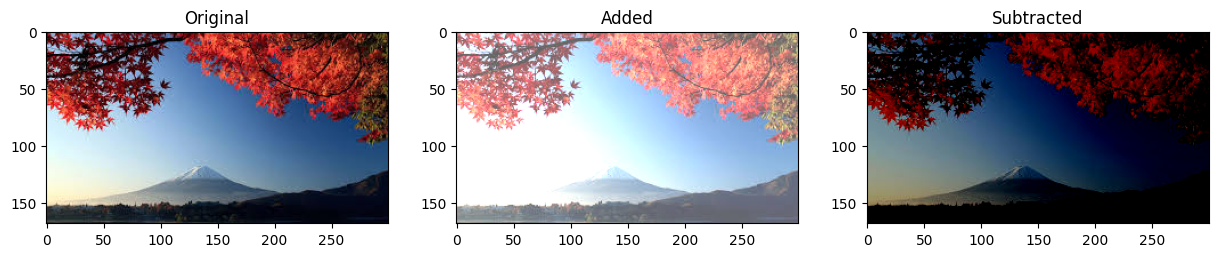

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./japan.jpg')

M = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)


plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(added[...,::-1]);plt.title("Added");
plt.subplot(133);plt.imshow(subtracted[...,::-1]);plt.title("Subtracted");


cv2.imshow("Original", image)
cv2.imshow("Added", added)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

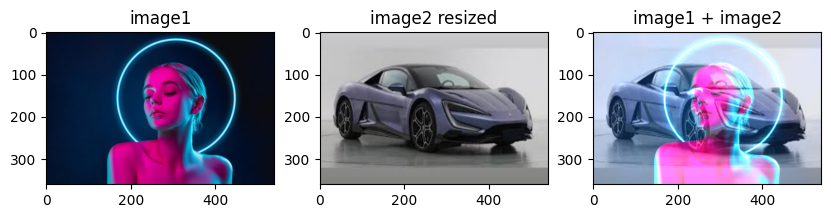

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./woman.jpg')
img2 = cv2.imread('./car.jpg')

# Resize img2 to have exactly the same dimensions as img1
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

output_image = cv2.add(img1, img2_resized)

plt.figure(figsize=[10,5])
plt.subplot(131); plt.imshow(img1[...,::-1]);     plt.title("image1")
plt.subplot(132); plt.imshow(img2_resized[...,::-1]); plt.title("image2 resized")
plt.subplot(133); plt.imshow(output_image[...,::-1]); plt.title("image1 + image2")
plt.show()

In [11]:
import cv2
import numpy as np

img1 = cv2.imread('./woman.jpg')
img2 = cv2.imread('./car.jpg')

print(img1.shape)
print(img2.shape)

(360, 540, 3)
(168, 300, 3)


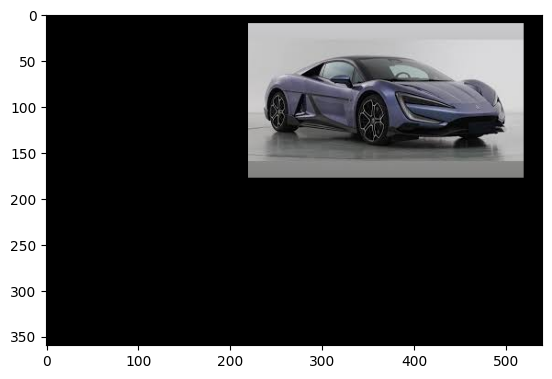

In [14]:
img1 = cv2.imread('./woman.jpg')
img2 = cv2.imread('./car.jpg')

logo_h, logo_w, _ = img2.shape

padded_img2 = np.zeros_like(img1)

location_h = 10
location_w = img1.shape[1] - logo_w - 20   # 20 px from right

padded_img2[location_h:location_h+logo_h, location_w:location_w+logo_w, :] = img2

plt.imshow(padded_img2[...,::-1])
plt.show()

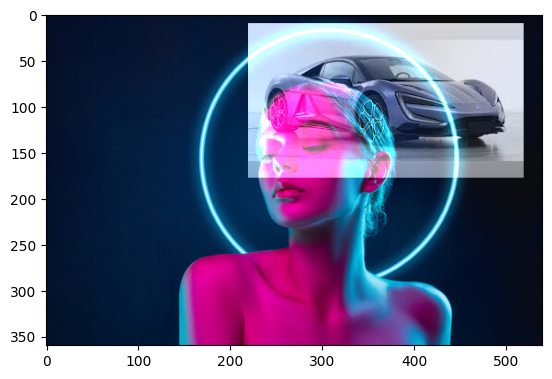

In [15]:
output_image = cv2.add(img1,padded_img2)
plt.imshow(output_image[...,::-1])

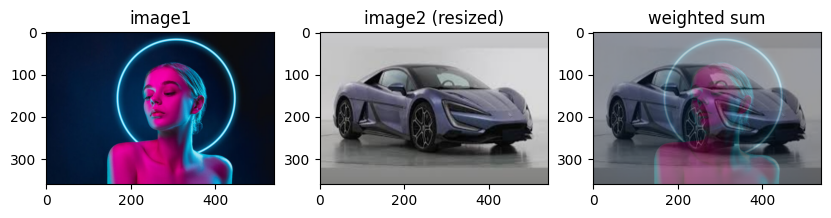

In [18]:
img1 = cv2.imread('./woman.jpg')
img2 = cv2.imread('./car.jpg')

if img1 is None or img2 is None:
    print("One or both images failed to load. Check file paths and names.")
else:
    h, w = img1.shape[:2]
    img2_resized = cv2.resize(img2, (w, h))

    output_image = cv2.addWeighted(img1, 0.3, img2_resized, 0.7, 0)

    plt.figure(figsize=[10,5])
    plt.subplot(131); plt.imshow(img1[...,::-1]);     plt.title("image1")
    plt.subplot(132); plt.imshow(img2_resized[...,::-1]); plt.title("image2 (resized)")
    plt.subplot(133); plt.imshow(output_image[...,::-1]); plt.title("weighted sum")
    plt.show()

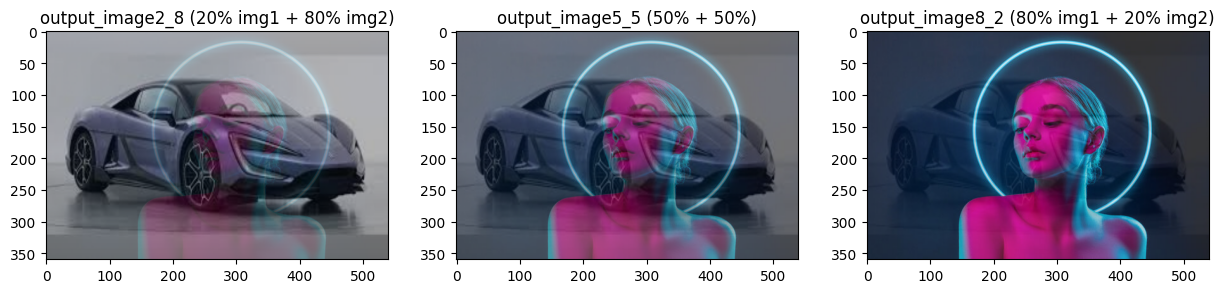

In [20]:
img1 = cv2.imread('./woman.jpg')
img2 = cv2.imread('./car.jpg')

if img1 is None or img2 is None:
    print("One or both images failed to load – check paths")
else:
    h, w = img1.shape[:2]
    img2 = cv2.resize(img2, (w, h))

    output_image2_8 = cv2.addWeighted(img1, 0.2, img2, 0.8, 0)
    output_image5_5 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
    output_image8_2 = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)

    plt.figure(figsize=[15, 5])
    plt.subplot(131); plt.imshow(output_image2_8[...,::-1]); plt.title("output_image2_8 (20% img1 + 80% img2)")
    plt.subplot(132); plt.imshow(output_image5_5[...,::-1]); plt.title("output_image5_5 (50% + 50%)")
    plt.subplot(133); plt.imshow(output_image8_2[...,::-1]); plt.title("output_image8_2 (80% img1 + 20% img2)")
    plt.show()